In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) 
%matplotlib inline 
import scipy.stats as stats

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
# checking head and tail

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [6]:
# checking info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [8]:
# Consists of 440 non null value in every column

In [9]:
df.Channel.unique()

array(['Retail', 'Hotel'], dtype=object)

In [10]:
df.Region.unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [11]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [12]:
# Checking data spread

In [13]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [14]:
# Setting buyer/Spender as Index
df.set_index('Buyer/Spender', inplace = True)
# Creating another column total spend
df.loc[:,'Total Spend'] = df.Fresh + df.Milk + df.Grocery + df.Frozen 
+ df.Detergents_Paper + df.Delicatessen
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,30100
2,Retail,Other,7057,9810,9568,1762,3293,1776,28197
3,Retail,Other,6353,8808,7684,2405,3516,7844,25250
4,Hotel,Other,13265,1196,4221,6404,507,1788,25086
5,Retail,Other,22615,5410,7198,3915,1777,5185,39138


In [16]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,30100
2,Retail,Other,7057,9810,9568,1762,3293,1776,28197
3,Retail,Other,6353,8808,7684,2405,3516,7844,25250
4,Hotel,Other,13265,1196,4221,6404,507,1788,25086
5,Retail,Other,22615,5410,7198,3915,1777,5185,39138


In [17]:
print(df.Channel.value_counts(),'\n')
print(df.Region.value_counts())

Hotel     298
Retail    142
Name: Channel, dtype: int64 

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64


- 298 customers from Hotel and 142 from Retail
- 316 from other, 77 from Lisbon, 47 from Oporto

In [18]:
df_region_sum = df.groupby('Region').sum()
df_channel_sum = df.groupby('Channel').sum()

In [19]:
df_region_sum.reset_index(inplace = True)
df_region_sum

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,Lisbon,854833,422454,570037,231026,204136,104327,2078350
1,Oporto,464721,239144,433274,190132,173311,54506,1327271
2,Other,3960577,1888759,2495251,930492,890410,512110,9275079


In [20]:
df_channel_sum.reset_index(inplace = True)
df_channel_sum

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7342027
1,Retail,1264414,1521743,2317845,234671,1032270,248988,5338673


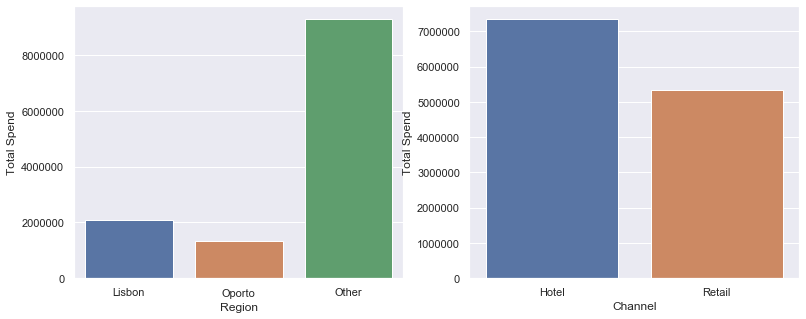

In [21]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.barplot(df_region_sum.Region, df_region_sum['Total Spend'])
plt.subplot(1,2,2)
sns.barplot(df_channel_sum.Channel, df_channel_sum['Total Spend']);

- If we talk about total expenditure Region wise "Other" Region spends most: 10677599 and Oporto spends least: 1555088
- If we talk about total expenditure Channel wise: Hotels tend to spend more when compared to Retail.

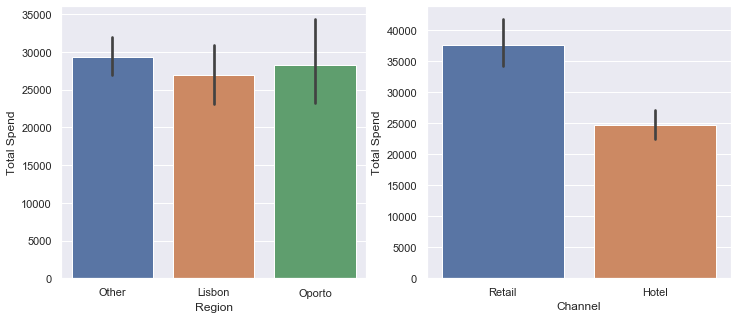

In [22]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(df.Region, df['Total Spend']);
plt.subplot(1,2,2)
sns.barplot(df.Channel, df['Total Spend'])

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

- The data needs to be sorted based on region and channel and then describe function can be used to see the distribution
- Additional columns of IQR and COV needs to be added

#### Sorting based on region

In [23]:
df1 = df.groupby('Region').describe()

In [24]:
df_r_fresh = df1.Fresh
df_r_milk = df1.Milk
df_r_groc = df1.Grocery
df_r_froz = df1.Frozen
df_r_detr = df1.Detergents_Paper
df_r_del = df1.Delicatessen

In [25]:
df_r_fresh.loc[:,'IQR'] = df_r_fresh['75%'] -  df_r_fresh['25%']
df_r_fresh.loc[:,'COV'] = df_r_fresh['std'] / df_r_fresh['mean']


C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [26]:
print('Fresh distribution across Regions: -')
df_r_fresh

Fresh distribution across Regions: -


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Region,,,,,,,,,,
Lisbon,77.0,11101.727273,11557.438575,18.0,2806.00,7363.0,15218.0,56083.0,12412.00,1.041049
Oporto,47.0,9887.680851,8387.899211,3.0,2751.50,8090.0,14925.5,32717.0,12174.00,0.848318
Other,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.5,112151.0,14055.75,1.068277


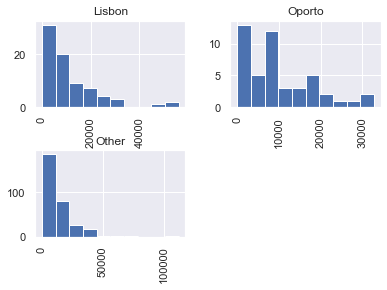

In [27]:
df.hist(by = 'Region', column = 'Fresh');

Insights: -
- too much insoncsistent in Lisbon and Other

In [28]:
df_r_milk.loc[:,'IQR'] = df_r_milk['75%'] - df_r_milk['25%']

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [29]:
df_r_milk.loc[:,'COV'] = df_r_milk['std']/df_r_milk['mean']

In [30]:
df_r_milk

,count,mean,std,min,25%,50%,75%,max,IQR,COV
Region,,,,,,,,,,
Lisbon,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.00,28326.0,6131.00,1.039815
Oporto,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.50,25071.0,4342.00,1.145076
Other,316.0,5977.085443,7935.463443,55.0,1634.0,3684.5,7198.75,73498.0,5564.75,1.327648


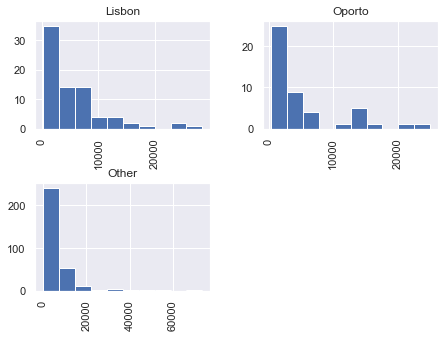

In [31]:
df.hist(by = "Region", column = 'Milk',figsize = (7,5));

In [32]:
df_r_groc.loc[:,'IQR'] = df_r_groc['75%'] - df_r_groc['25%']
df_r_groc.loc[:,'COV'] = df_r_groc['std']/df_r_groc['mean']
df_r_groc

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Region,,,,,,,,,,
Lisbon,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.00,39694.0,7444.00,1.147670
Oporto,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.50,67298.0,8966.00,1.176182
Other,316.0,7896.363924,9537.287778,3.0,2141.5,4732.0,10559.75,92780.0,8418.25,1.207808


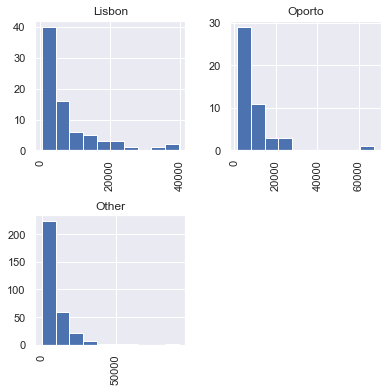

In [33]:
df.hist(by = 'Region', column = 'Grocery', figsize=(6,6));

In [34]:
df_r_froz.loc[:,'IQR'] = df_r_froz.loc[:,'75%']-df_r_froz.loc[:,'25%']
df_r_froz.loc[:,'COV'] = df_r_froz.loc[:,'std']/df_r_froz.loc[:,'mean']
df_r_froz

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Region,,,,,,,,,,
Lisbon,77.0,3000.337662,3092.143894,61.0,950.00,1801.0,4324.00,18711.0,3374.0,1.030599
Oporto,47.0,4045.361702,9151.784954,131.0,811.50,1455.0,3272.00,60869.0,2460.5,2.262291
Other,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0,2690.0,1.446761


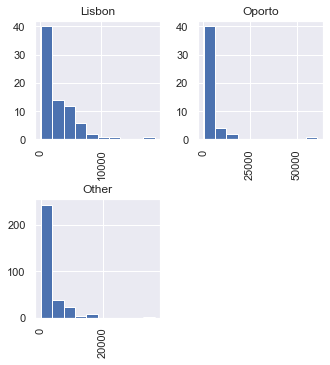

In [35]:
df.hist(by = 'Region', column = 'Frozen',figsize=(5,5.5));

In [36]:
df_r_detr.loc[:,'IQR'] = df_r_detr.loc[:,'75%'] - df_r_detr.loc[:,'25%']
df_r_detr.loc[:,'COV'] = df_r_detr.loc[:,'std']/df_r_detr.loc[:,'mean']
df_r_detr

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Region,,,,,,,,,,
Lisbon,77.0,2651.116883,4208.462708,5.0,284.00,737.0,3593.00,19410.0,3309.0,1.587430
Oporto,47.0,3687.468085,6514.717668,15.0,282.50,811.0,4324.50,38102.0,4042.0,1.766718
Other,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0,3624.5,1.630040


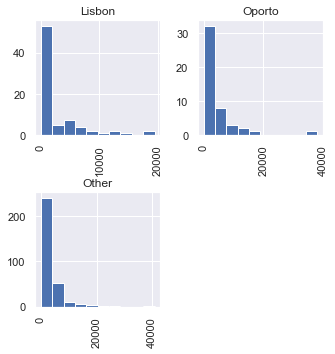

In [37]:
df.hist(by = 'Region', column = 'Detergents_Paper', figsize=(5,5.3));

In [38]:
df_r_del.loc[:,'IQR'] = df_r_del.loc[:,'75%'] - df_r_del.loc[:,'25%']
df_r_del.loc[:,'COV'] = df_r_del.loc[:,'std']/df_r_del.loc[:,'mean']
df_r_del

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Region,,,,,,,,,,
Lisbon,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.00,6854.0,1227.00,0.993008
Oporto,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.50,5609.0,998.00,0.906043
Other,316.0,1620.601266,3232.581660,3.0,402.0,994.0,1832.75,47943.0,1430.75,1.994680


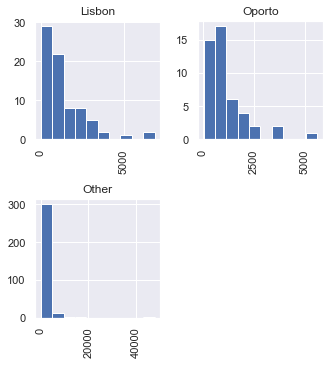

In [39]:
df.hist(by = 'Region', column = 'Delicatessen', figsize=(5,5.5));

#### Sorting based on channel

In [40]:
df2 = df.groupby('Channel').describe()

In [41]:
df2_c_fresh = df2.Fresh
df2_c_milk = df2.Milk
df2_c_groc = df2.Grocery
df2_c_froz = df2.Frozen
df2_c_det = df2.Detergents_Paper
df2_c_del = df2.Delicatessen

In [42]:
df2_c_fresh.loc[:,'IQR'] = df2_c_fresh.loc[:,'75%'] - df2_c_fresh.loc[:,'25%']
df2_c_fresh.loc[:,'COV'] = df2_c_fresh.loc[:,'std']/df2_c_fresh.loc[:,'mean']
df2_c_fresh

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Channel,,,,,,,,,,
Hotel,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0,14204.5,1.026428
Retail,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0,9882.0,1.009365


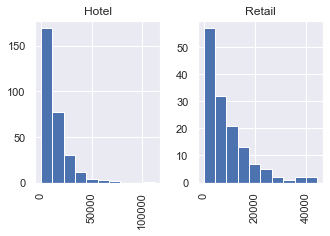

In [43]:
df.hist(by = 'Channel', column = 'Fresh', figsize = (5,3));

In [44]:
df2_c_milk.loc[:,'IQR'] = df2_c_milk['75%'] - df2_c_milk['25%']
df2_c_milk.loc[:,'COV'] = df2_c_milk['std']/df2_c_milk['mean']
df2_c_milk


C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Channel,,,,,,,,,,
Hotel,298.0,3451.724832,4352.165571,55.0,1164.5,2157.0,4029.50,43950.0,2865.00,1.260867
Retail,142.0,10716.500000,9679.631351,928.0,5938.0,7812.0,12162.75,73498.0,6224.75,0.903246


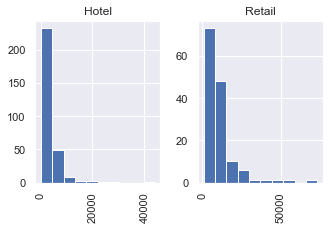

In [45]:
df.hist(by = 'Channel', column = 'Milk', figsize = (5,3));

In [46]:
df2_c_groc.loc[:,'IQR'] = df2_c_groc['75%'] - df2_c_groc['25%']
df2_c_groc.loc[:,'COV'] = df2_c_groc['std']/df2_c_groc['mean']
df2_c_groc

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Channel,,,,,,,,,,
Hotel,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0,3373.00,0.894849
Retail,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0,10938.25,0.751543


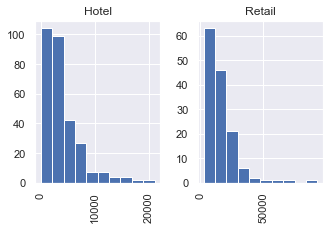

In [47]:
df.hist(by = 'Channel', column = 'Grocery', figsize = (5,3));

In [48]:
df2_c_froz.loc[:,'IQR'] = df2_c_froz.loc[:,'75%'] - df2_c_froz.loc[:,'25%']
df2_c_froz.loc[:,'COV'] = df2_c_froz.loc[:,'std']/df2_c_froz.loc[:,'mean']
df2_c_froz

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Channel,,,,,,,,,,
Hotel,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0,3728.75,1.505745
Retail,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0,1612.50,1.096932


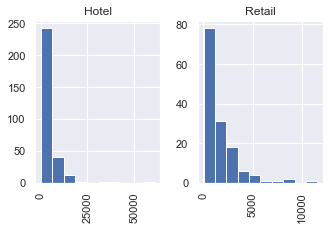

In [49]:
df.hist(by = 'Channel', column = 'Frozen', figsize = (5,3));

In [50]:
df2_c_det.loc[:,'IQR'] = df2_c_det.loc[:,'75%'] - df2_c_det.loc[:,'25%']
df2_c_det.loc[:,'COV'] = df2_c_det.loc[:,'std'] / df2_c_det.loc[:,'mean']
df2_c_det

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Channel,,,,,,,,,,
Hotel,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.5,6907.0,716.25,1.396596
Retail,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.5,40827.0,4979.00,0.865408


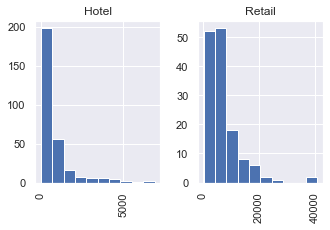

In [51]:
df.hist(by = 'Channel', column = 'Detergents_Paper', figsize = (5,3));

In [52]:
df2_c_del.loc[:,'IQR'] = df2_c_del.loc[:,'75%'] - df2_c_del.loc[:,'25%']
df2_c_del.loc[:,'COV'] = df2_c_del.loc[:,'std'] / df2_c_del.loc[:,'mean']
df2_c_del

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Channel,,,,,,,,,,
Hotel,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.0,47943.0,1169.00,2.222828
Retail,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.0,16523.0,1589.25,1.114267


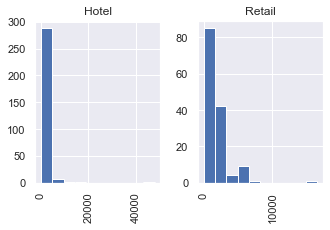

In [53]:
df.hist(by = 'Channel', column = 'Delicatessen', figsize = (5,3));


In [54]:
df_lisbon = df[df['Region']=="Lisbon"]
df_oporto = df[df['Region']=="Oporto"]
df_other = df[df['Region'] == "Other"]


In [55]:
df_lisbon_des = df_lisbon.describe().T
df_oporto_des = df_oporto.describe().T
df_other_des = df_other.describe().T

### Region wise distribution of variables-


In [56]:
df_lisbon_des.loc[:,'IQR'] = df_lisbon_des['75%']-df_lisbon_des['25%']

In [57]:
df_lisbon_des.loc[:,'COV'] = df_lisbon_des['std']/df_lisbon_des['mean']

In [58]:
df_lisbon_des

,count,mean,std,min,25%,50%,75%,max,IQR,COV
Fresh,77.0,11101.727273,11557.438575,18.0,2806.0,7363.0,15218.0,56083.0,12412.0,1.041049
Milk,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.0,28326.0,6131.0,1.039815
Grocery,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.0,39694.0,7444.0,1.147670
Frozen,77.0,3000.337662,3092.143894,61.0,950.0,1801.0,4324.0,18711.0,3374.0,1.030599
Detergents_Paper,77.0,2651.116883,4208.462708,5.0,284.0,737.0,3593.0,19410.0,3309.0,1.587430
Delicatessen,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.0,6854.0,1227.0,0.993008
Total Spend,77.0,26991.558442,17177.387886,3953.0,16194.0,21802.0,34738.0,84875.0,18544.0,0.636399


				LISBON DISTRIBUTION


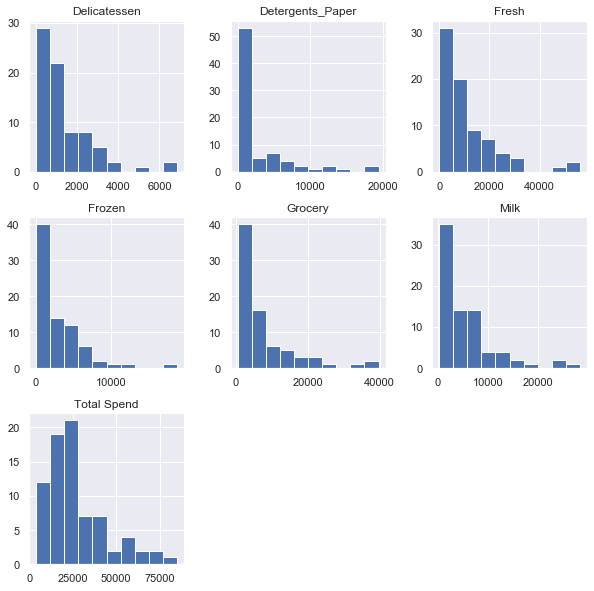

In [59]:
print('\t\t\t\tLISBON DISTRIBUTION')
df_lisbon.hist(figsize = (10,10));

In [60]:
df_oporto_des.loc[:,'IQR'] = df_oporto_des['75%']-df_oporto_des['25%']

In [61]:
df_oporto_des.loc[:,'COV'] = df_oporto_des['std']/df_oporto_des['mean']

In [62]:
print('OPORTO DISTRIBUTION')
df_oporto_des

OPORTO DISTRIBUTION


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Fresh,47.0,9887.680851,8387.899211,3.0,2751.5,8090.0,14925.5,32717.0,12174.0,0.848318
Milk,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.5,25071.0,4342.0,1.145076
Grocery,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.5,67298.0,8966.0,1.176182
Frozen,47.0,4045.361702,9151.784954,131.0,811.5,1455.0,3272.0,60869.0,2460.5,2.262291
Detergents_Paper,47.0,3687.468085,6514.717668,15.0,282.5,811.0,4324.5,38102.0,4042.0,1.766718
Delicatessen,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.5,5609.0,998.0,0.906043
Total Spend,47.0,28239.808511,19986.523609,3519.0,18529.0,23500.0,31399.0,123996.0,12870.0,0.707743


				OPORTP distribution


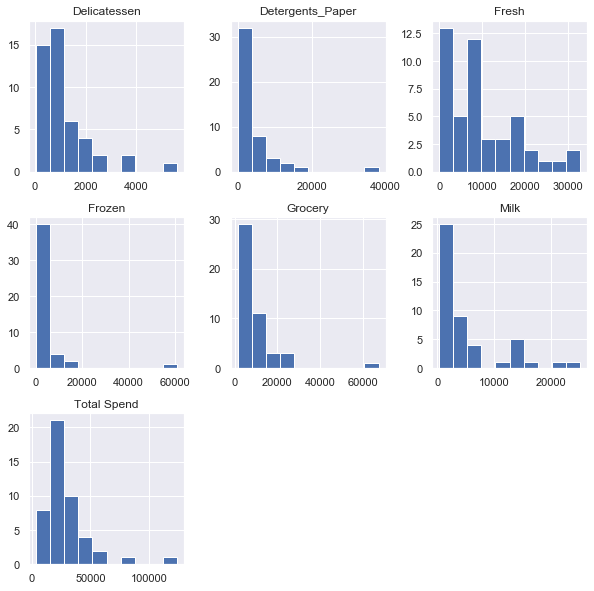

In [63]:
print('\t\t\t\tOPORTP distribution')
df_oporto.hist(figsize = (10,10));

In [64]:
df_other_des.loc[:,'IQR'] = df_other_des['75%']-df_other_des['25%']
df_other_des.loc[:,'COV'] = df_other_des['std']/df_other_des['mean']
print('OTHER DISTRIBUTION')
df_other_des

OTHER DISTRIBUTION


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Fresh,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.50,112151.0,14055.75,1.068277
Milk,316.0,5977.085443,7935.463443,55.0,1634.00,3684.5,7198.75,73498.0,5564.75,1.327648
Grocery,316.0,7896.363924,9537.287778,3.0,2141.50,4732.0,10559.75,92780.0,8418.25,1.207808
Frozen,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0,2690.00,1.446761
Detergents_Paper,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0,3624.50,1.630040
Delicatessen,316.0,1620.601266,3232.581660,3.0,402.00,994.0,1832.75,47943.0,1430.75,1.994680
Total Spend,316.0,29351.515823,23618.538900,889.0,15133.50,24198.5,35878.25,176671.0,20744.75,0.804679


				OTHER DISTRIBUTION


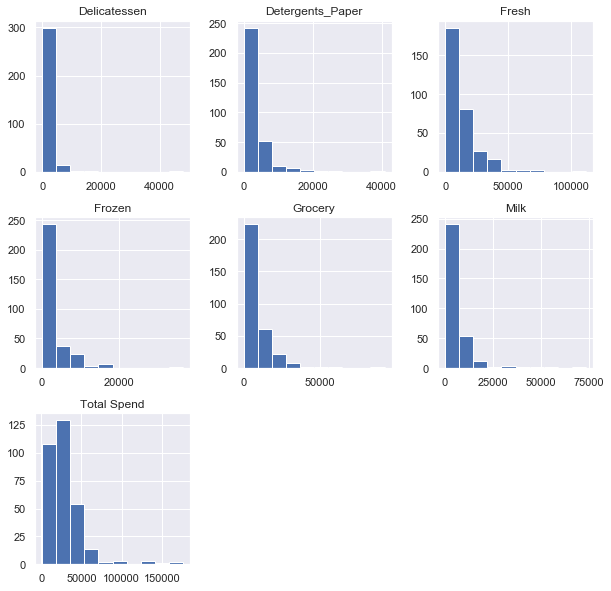

In [65]:
print("\t\t\t\tOTHER DISTRIBUTION")
df_other.hist(figsize = (10,10));

### Channel wise distribution of variables

In [66]:
df_hotel = df[df.Channel == "Hotel"]
df_retail = df[df.Channel == "Retail"]

In [67]:
df_hotel_des = df_hotel.describe().T
df_retail_des = df_retail.describe().T

In [68]:
df_hotel_des.loc[:,'IQR'] = df_hotel_des['75%'] - df_hotel_des['25%']
df_hotel_des.loc[:,'COV'] = df_hotel_des['std']/df_hotel_des['mean']

In [69]:
print('HOTEL DISTRIBUTION')
df_hotel_des

HOTEL DISTRIBUTION


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Fresh,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0,14204.50,1.026428
Milk,298.0,3451.724832,4352.165571,55.0,1164.50,2157.0,4029.50,43950.0,2865.00,1.260867
Grocery,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0,3373.00,0.894849
Frozen,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0,3728.75,1.505745
Detergents_Paper,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.50,6907.0,716.25,1.396596
Delicatessen,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.00,47943.0,1169.00,2.222828
Total Spend,298.0,24637.674497,20222.156623,889.0,12257.75,19478.5,30083.75,176671.0,17826.00,0.820782


				HOTEL DISTRIBUTION


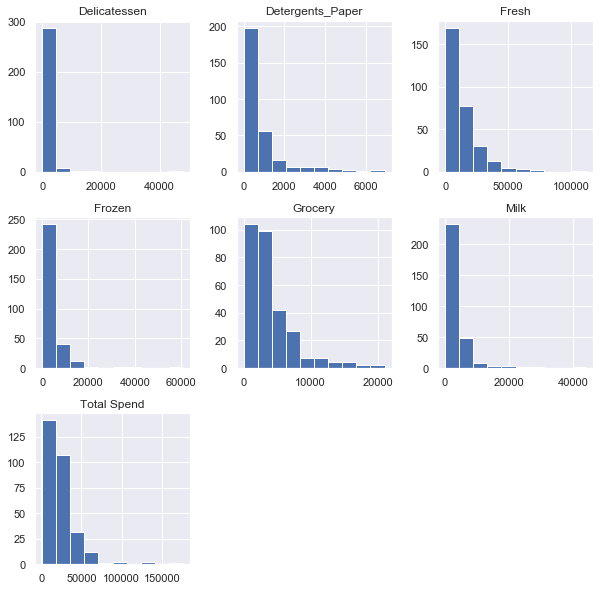

In [70]:
print('\t\t\t\tHOTEL DISTRIBUTION')
df_hotel.hist(figsize = (10,10));

In [71]:
df_retail_des.loc[:,'IQR'] = df_retail_des['75%'] - df_retail_des['25%']
df_retail_des.loc[:,'COV'] = df_retail_des['std'] / df_retail_des['mean']
print('RETAIL DISTRIBUTION')
df_retail_des

RETAIL DISTRIBUTION


,count,mean,std,min,25%,50%,75%,max,IQR,COV
Fresh,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0,9882.00,1.009365
Milk,142.0,10716.500000,9679.631351,928.0,5938.00,7812.0,12162.75,73498.0,6224.75,0.903246
Grocery,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0,10938.25,0.751543
Frozen,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0,1612.50,1.096932
Detergents_Paper,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.50,40827.0,4979.00,0.865408
Delicatessen,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.00,16523.0,1589.25,1.114267
Total Spend,142.0,37596.288732,23711.757409,10902.0,23778.50,30614.0,42577.75,162078.0,18799.25,0.630694


				RETAIL DISTRIBUTION


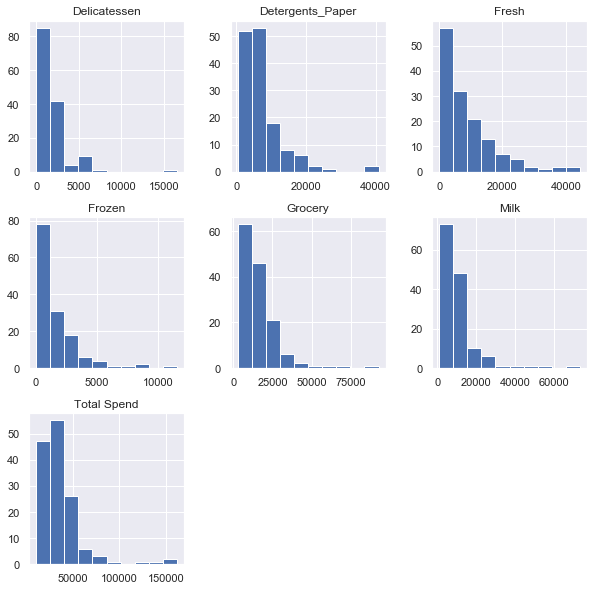

In [72]:
print('\t\t\t\tRETAIL DISTRIBUTION')
df_retail.hist(figsize = (10,10));

## 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour?

In [73]:
df_des = df.describe().T
df_des.loc[:,'IQR'] = df_des['75%'] - df_des['25%']

In [74]:
df_des.loc[:,'COV'] = df_des['std']/df_des['mean']

In [75]:
df_des[['std','mean','IQR','COV']].sort_values(by = "COV", ascending = False)

,std,mean,IQR,COV
Delicatessen,2820.105937,1524.870455,1412.00,1.849407
Detergents_Paper,4767.854448,2881.493182,3665.25,1.654647
Frozen,4854.673333,3071.931818,2812.00,1.580332
Milk,7380.377175,5796.265909,5657.25,1.273299
Grocery,9503.162829,7951.277273,8502.75,1.195174
Fresh,12647.328865,12000.297727,13806.00,1.053918
Total Spend,22226.860894,28819.772727,19667.00,0.771237


					DISTRIBUTION OF VARIABLES


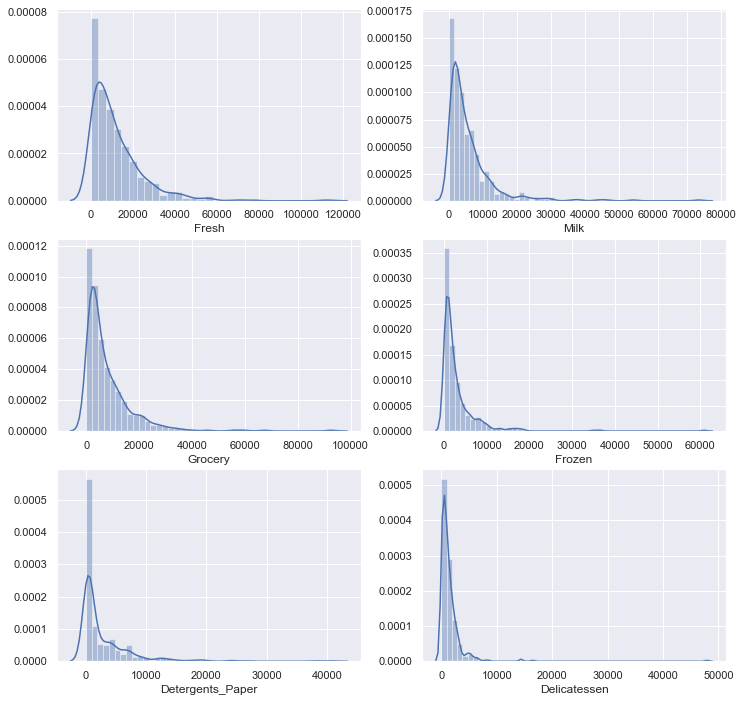

In [76]:
print('\t\t\t\t\tDISTRIBUTION OF VARIABLES')

plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
sns.distplot(df.Fresh)
plt.subplot(3,2,2)
sns.distplot(df.Milk)
plt.subplot(3,2,3)
sns.distplot(df.Grocery)
plt.subplot(3,2,4)
sns.distplot(df.Frozen)
plt.subplot(3,2,5)
sns.distplot(df.Detergents_Paper)
plt.subplot(3,2,6)
sns.distplot(df.Delicatessen)
plt.show()

Insights
- Delicasteen is the most inconsistent
- Fresh is the most inconsistent

## 1.4 Are there any outliers in the data?

Using boxplots to check outliers

						DETECTING OUTLIERS


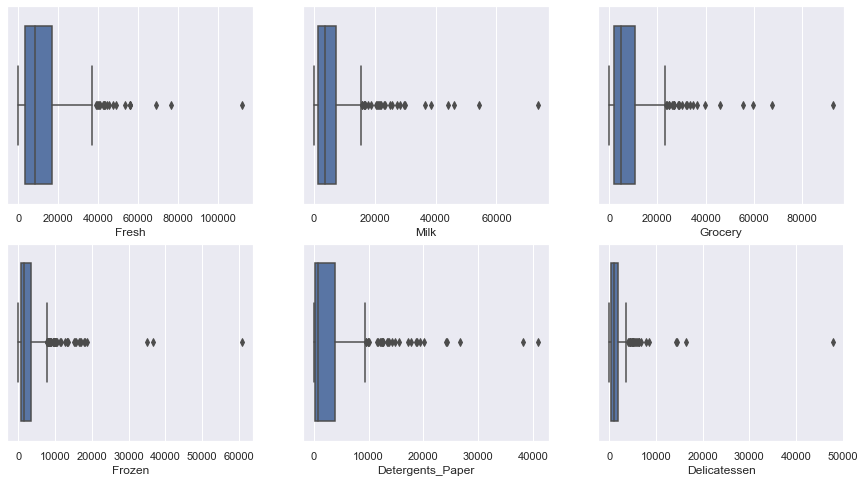

In [77]:
print('\t\t\t\t\t\tDETECTING OUTLIERS')
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.boxplot(df.Fresh)
plt.subplot(2,3,2)
sns.boxplot(df.Milk)
plt.subplot(2,3,3)
sns.boxplot(df.Grocery)
plt.subplot(2,3,4)
sns.boxplot(df.Frozen)
plt.subplot(2,3,5)
sns.boxplot(df.Detergents_Paper)
plt.subplot(2,3,6)
sns.boxplot(df.Delicatessen)
plt.show()

## 1.5 On the basis of this report, what are the recommendations?

Cross tabs are made to better understand the distribution of customers across region and channel.
Since the data is too inconsistent, the median values can be looked for insights, as mean is often deceptive.
Countplot and barplots can be visualized for better appeal.

In [78]:
df_cross = pd.crosstab(df.Region, df.Channel, margins=True)
df_cross

Channel,Hotel,Retail,All
Region,,,
Lisbon,59,18,77
Oporto,28,19,47
Other,211,105,316
All,298,142,440


In [79]:
df_cross_sum = pd.pivot_table(df, 'Total Spend' , index = ['Region'], columns = ['Channel'], aggfunc = 'sum')
df_cross_sum

Channel,Hotel,Retail
Region,,
Lisbon,1411629,666721
Oporto,674669,652602
Other,5255729,4019350


In [80]:
df_cross_med = pd.pivot_table(df, 'Total Spend' , index = ['Region'], 
                              columns = ['Channel'], aggfunc = 'median')
df_cross_med

Channel,Hotel,Retail
Region,,
Lisbon,20245,35324
Oporto,20867,29875
Other,18609,30124


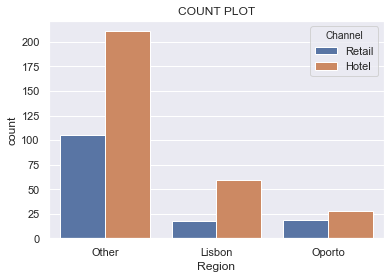

In [81]:
plt.title('COUNT PLOT')
sns.countplot(df.Region, hue = df.Channel);

In [82]:
df_cross_med.reset_index(inplace = True)
df_cross_med

Channel,Region,Hotel,Retail
0,Lisbon,20245,35324
1,Oporto,20867,29875
2,Other,18609,30124


							MEDIAN EXPENDITURE


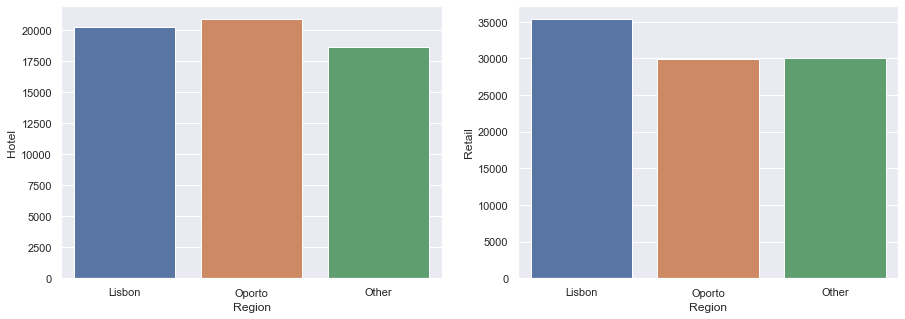

In [83]:
print('\t\t\t\t\t\t\tMEDIAN EXPENDITURE')

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(df_cross_med.Region, df_cross_med.Hotel);
plt.subplot(1,2,2)
sns.barplot(df_cross_med.Region, df_cross_med.Retail);